# [Scikit-lean](http://scikit-learn.org)

* Libreria de machine learning en python

__Data mining__
* Descubrir patrones en los datos
* Extraer información a partir de los datos

__Cluster analysis__
* Clasificar a un ocnjunto de individuos en grupos homogeneos (tecnicas multivariantes)
* Detección de anomalias
* Reglas de asociación (apriori)

__Redes Neuronales__

__Regresión lineal__

__Arboles de decisión__

__Modelos probabilisticos/estadisticos__

__Clustering__

___Tipos de algoritmos___: 
* Supervisados (predicen un datos a partir de un conjunto de datos)
* No-Supervisados (Descubren patrones y tendencias en los datos

# [Neural network models (supervised)](http://scikit-learn.org/stable/modules/neural_networks_supervised.html)

## [Multi-Layer Perceptron (MLP)](https://en.wikipedia.org/wiki/Multilayer_perceptron)

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function 

$$ f: R^m \rightarrow R^o $$

by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output.

Given a set of features $ X = x_1, x_2, x_3, ... x_m $ and a target $y$ 

it can learn a non-linear function approximator for either classification or regression.

It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called _hidden layers_



<img src="multilayerperceptron_network.png" width=300 height=300>

## Classification

In [8]:
from sklearn.neural_network import MLPClassifier
import numpy as np

MLP trains on two arrays: 
* Array $X$ of size (n_samples, n_features),  which holds the training samples represented as floating point feature vectors;
* Array $y$ of size (n_samples,), 
which holds the target values (class labels) for the training samples:

In [40]:
X = np.array([[5.3, 4.4, 5.5], [2., 9., 9.]]) # first sample have value features equal to zero, then the target value is zero
X

array([[ 5.3,  4.4,  5.5],
       [ 2. ,  9. ,  9. ]])

In [41]:
y = np.array(['aprobado','suspenso'])
y

array(['aprobado', 'suspenso'],
      dtype='<U8')

In [42]:
X.shape

(2, 3)

In [99]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

documentation : [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

__solver__: for weight optimization.
* 'lbfgs' is an optimizer in the family of quasi-Newton methods.
* ‘sgd’ refers to stochastic gradient descent.
* ‘adam’ refers to a stochastic gradient-based optimizer 

The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

__alpha__:  float, optional, default 0.0001
* L2 penalty (regularization term) parameter.

__hidden_layer_sizes__ : tuple, length = n_layers - 2, default (100,)
* The $i_{th}$ element represents the number of neurons in the ith hidden layer.

__random_state__ : int, RandomState instance or None, optional, default None

Training the model 

In [100]:
clf.fit(X, y) 

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

After fitting (training), the model can predict labels for new samples $X_o$

In [101]:
Xo = np.array([[4., 5., 6.], [9., 4., 3.]])
Xo

array([[ 4.,  5.,  6.],
       [ 9.,  4.,  3.]])

In [102]:
clf.predict(Xo)

array(['aprobado', 'suspenso'],
      dtype='<U8')

__clf.coefs__ contains the weight matrices that constitute the model parameters:

In [103]:
[coef.shape for coef in clf.coefs_]

[(3, 5), (5, 2), (2, 1)]

In [104]:
clf.coefs_[0]

array([[-0.14371331,  0.38158987, -0.86577433, -0.34234908, -0.61179931],
       [-0.70604707, -0.54338001, -0.2674803 , -0.17879304,  0.06722844],
       [-0.13995064,  0.32078996, -0.5118724 ,  0.65487854, -0.81853862]])

In [105]:
clf.coefs_[1]

array([[ 0.55683666,  0.86699891],
       [-0.34545016,  0.3560905 ],
       [ 0.69689465,  0.73062486],
       [-0.76830181, -0.85345248],
       [-0.61131786,  0.70014102]])

In [106]:
clf.coefs_[2]

array([[ 1.29502793],
       [ 0.09379985]])

__MLP__ trains using [__Backpropagation__](https://en.wikipedia.org/wiki/Backpropagation). More precisely, it trains using some form of __Gradient Descent__
and the gradients are calculated using Backpropagation. 

For classification, it minimizes the [__Cross-Entropy loss function__](http://neuralnetworksanddeeplearning.com/chap3.html), ([loss function](http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html))
giving a vector of probability estimates __$P(y|x)$__ per sample $x$:

In [108]:
# probability that the sample of the row ith have the label given with the restriction of the column jth
clf.predict_proba(Xo) 

array([[ 0.50000742,  0.49999258],
       [ 0.48606858,  0.51393142]])

## Varying regularization in Multi-layer Perceptron

A comparison of different values for regularization parameter ‘alpha’ on synthetic datasets. 
The plot shows that different alphas yield different decision functions.

Alpha is a parameter for regularization term, aka penalty term, that combats overfitting by 
constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) 
by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. 

Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, 
potentially resulting in a more complicated 
decision boundary.

In [132]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

In [133]:
h = .02  # step size in the mesh
alphas = np.logspace(-5, 3, 5)
names = []
classifiers = []

In [134]:
for i in alphas:
    names.append('alpha ' + str(i))
names

['alpha 1e-05', 'alpha 0.001', 'alpha 0.1', 'alpha 10.0', 'alpha 1000.0']

In [135]:
for i in alphas:
    classifiers.append(MLPClassifier(alpha=i, random_state=1))

In [136]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)

In [141]:
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


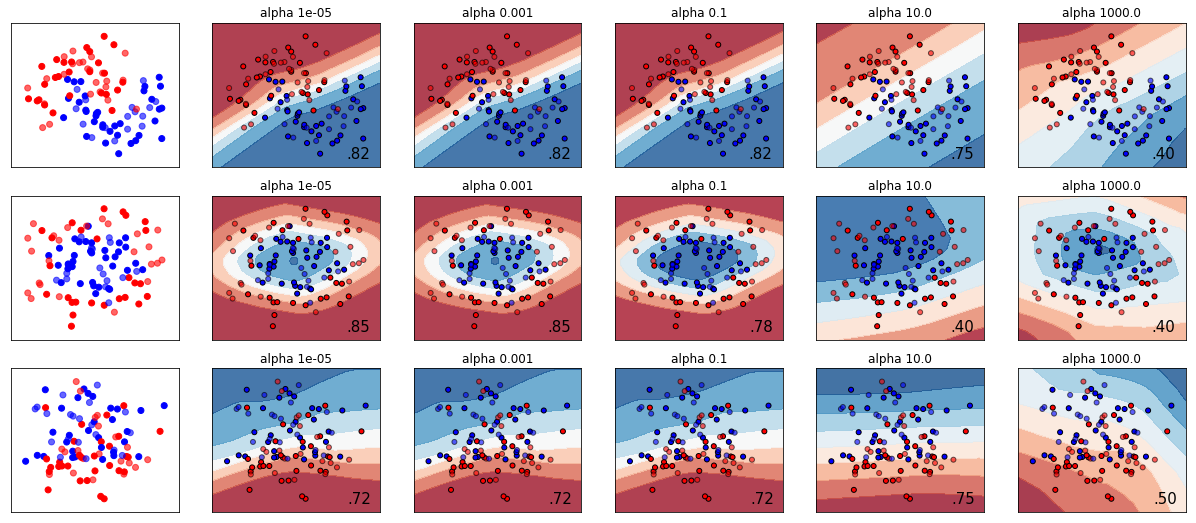

In [142]:
figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()
